In [19]:
import pathlib
import shutil
import glob
import os
import re
import ftfy
import pandas as pd
import statsmodels.api as sm
import numpy as np
import sklearn.metrics as metrics

import sklearn
import sklearn.linear_model

pd.options.display.max_rows = 1000
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv("consolidated_DF_2019_2019.csv", parse_dates=["trip_start_time", "trip_stop_time"])
rng = np.random.default_rng(42)
sampled_df = df.sample(n=200000, random_state=rng)
df = sampled_df

In [39]:
df["trip_start_daily_minutes"] = df["trip_start_time"].apply(lambda x: x.hour*60 + x.minute)
df["is_casual"] = df["is_casual"]*1

In [5]:
df["trip_binned_daytime"] = np.floor(df["trip_start_daily_minutes"]/(1*60))
df["trip_binned_daytime"] = df["trip_binned_daytime"].astype(int)

<AxesSubplot: >

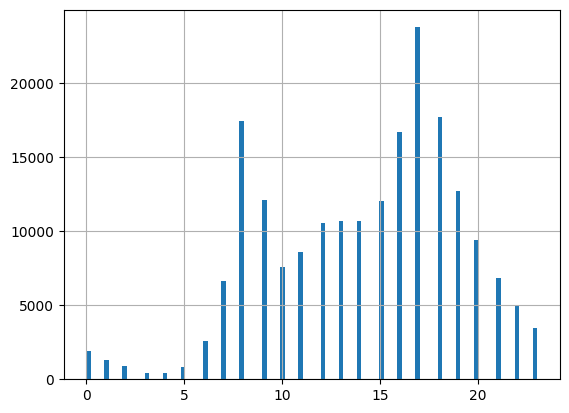

In [6]:
df["trip_binned_daytime"].hist(bins=100)

In [7]:
oh_hours_df = pd.get_dummies(df["trip_binned_daytime"])
oh_station_id_df = pd.get_dummies(df["from_station_id"])

<AxesSubplot: >

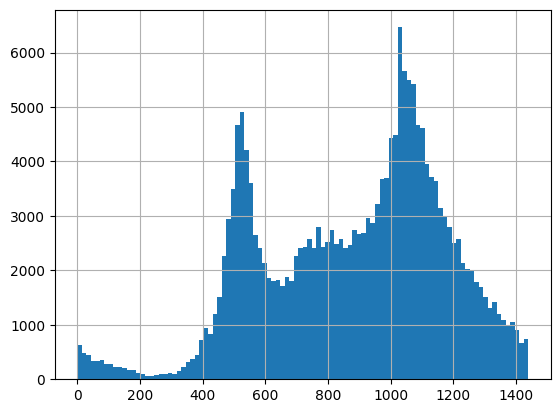

In [8]:
df["trip_start_daily_minutes"].hist(bins=100)

<AxesSubplot: >

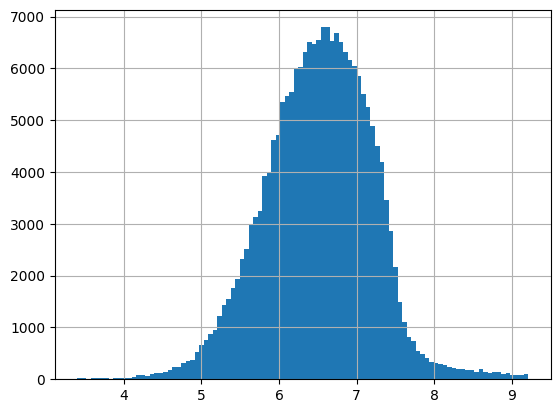

In [9]:
(df["trip_duration_seconds"]).apply(np.log).hist(bins=100)

In [10]:
regression = sklearn.linear_model.LinearRegression()

In [11]:
reg_features="trip_start_daily_minutes"
target = "trip_duration_seconds"

In [12]:
hours_df = oh_hours_df.drop(columns = oh_hours_df.columns[0])

In [13]:
station_df = oh_station_id_df.drop(columns= oh_station_id_df.columns[0])

In [45]:
x_df = pd.concat([hours_df, station_df, df["is_casual"]], axis=1)
x_df.columns = [str(x) for x in x_df.columns]

In [42]:
y = df[target]

In [46]:
model = regression.fit(x_df,y)

In [47]:
def regression_results(x, y_true, model):
    colnames = x.columns

    y_pred = model.predict(x)
    # Regression metrics
    col_coeffs = zip(model.coef_, colnames)
    col_coeffs_sorted = sorted(col_coeffs)

    r2=metrics.r2_score(y_true, y_pred)


    print(f"R^2: {round(r2,4)}")
    print(f"Intercept: {model.intercept_}")
    print(f"Top-5 coeffs: {col_coeffs_sorted[:10]}")



In [48]:
regression_results(x_df, y, model)

R^2: 0.2054
Intercept: 666.6672128627849
Top-5 coeffs: [(-211.67577769104818, '7170'), (-209.75478231273576, '7358'), (-202.49417448550986, '7323'), (-201.85413972120335, '7250'), (-200.0414168429142, '7039'), (-177.9109149139859, '7447'), (-175.30739465725645, '7161'), (-173.91384168187582, '7007'), (-173.00877336856445, '7293'), (-172.95898076646975, '7089')]
